# Visualization of Attention in BERT-base-model

In [ ]:
# Zainstalowanie odpowiednich bibliotek

!pip install transformers torch seaborn matplotlib

In [ ]:
# Import bibliotek

import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import BertTokenizer, BertModel

In [ ]:
# Ładowanie modelu

def load_bert_model(model_name='bert-base-uncased'):
  print(f"Ładowanie modelu: {model_name} ... ⌛")
  try:
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name, output_attentions=True)
    model.eval()
    return tokenizer, model
    print("Model załadowany poprawnie!")
  except Exception as e:
    print(f"Wystąpił błąd podczas ładowania modelu: {e}")
    raise e

tokenizer, model = load_bert_model()

Ładowanie modelu: bert-base-uncased ... ⌛


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
# Stwórzmy dataset

data = [
    "The animal didn't cross the street because it was too tired.",
    "He went to the bank to deposit money.",
    "The quick brown fox jumps over the lazy dog."
]

In [ ]:
def visualize_layer_heads(text, tokenizer, model, layer_num=0):
  # Input
    inputs = tokenizer(
        text,
        return_tensors="pt",
        add_special_tokens=True,
        max_length=128,
        truncation=True
    )

    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])

    # Attention
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)

    attention = outputs.attentions

    fig, axes = plt.subplots(3, 4, figsize=(24, 18), constrained_layout=True)
    axes = axes.flatten()

    for head_num in range(12):
        ax = axes[head_num]
        attn = attention[layer_num][0, head_num].cpu().numpy()

        sns.heatmap(
            attn,
            xticklabels=tokens,
            yticklabels=tokens,
            cmap="viridis",
            square=True,
            cbar=False,
            ax=ax
        )

        ax.set_title(f"Head {head_num}")
        ax.tick_params(axis='x', rotation=45)

    fig.suptitle(f"BERT Attention – Layer {layer_num}", fontsize=22)
    plt.show()


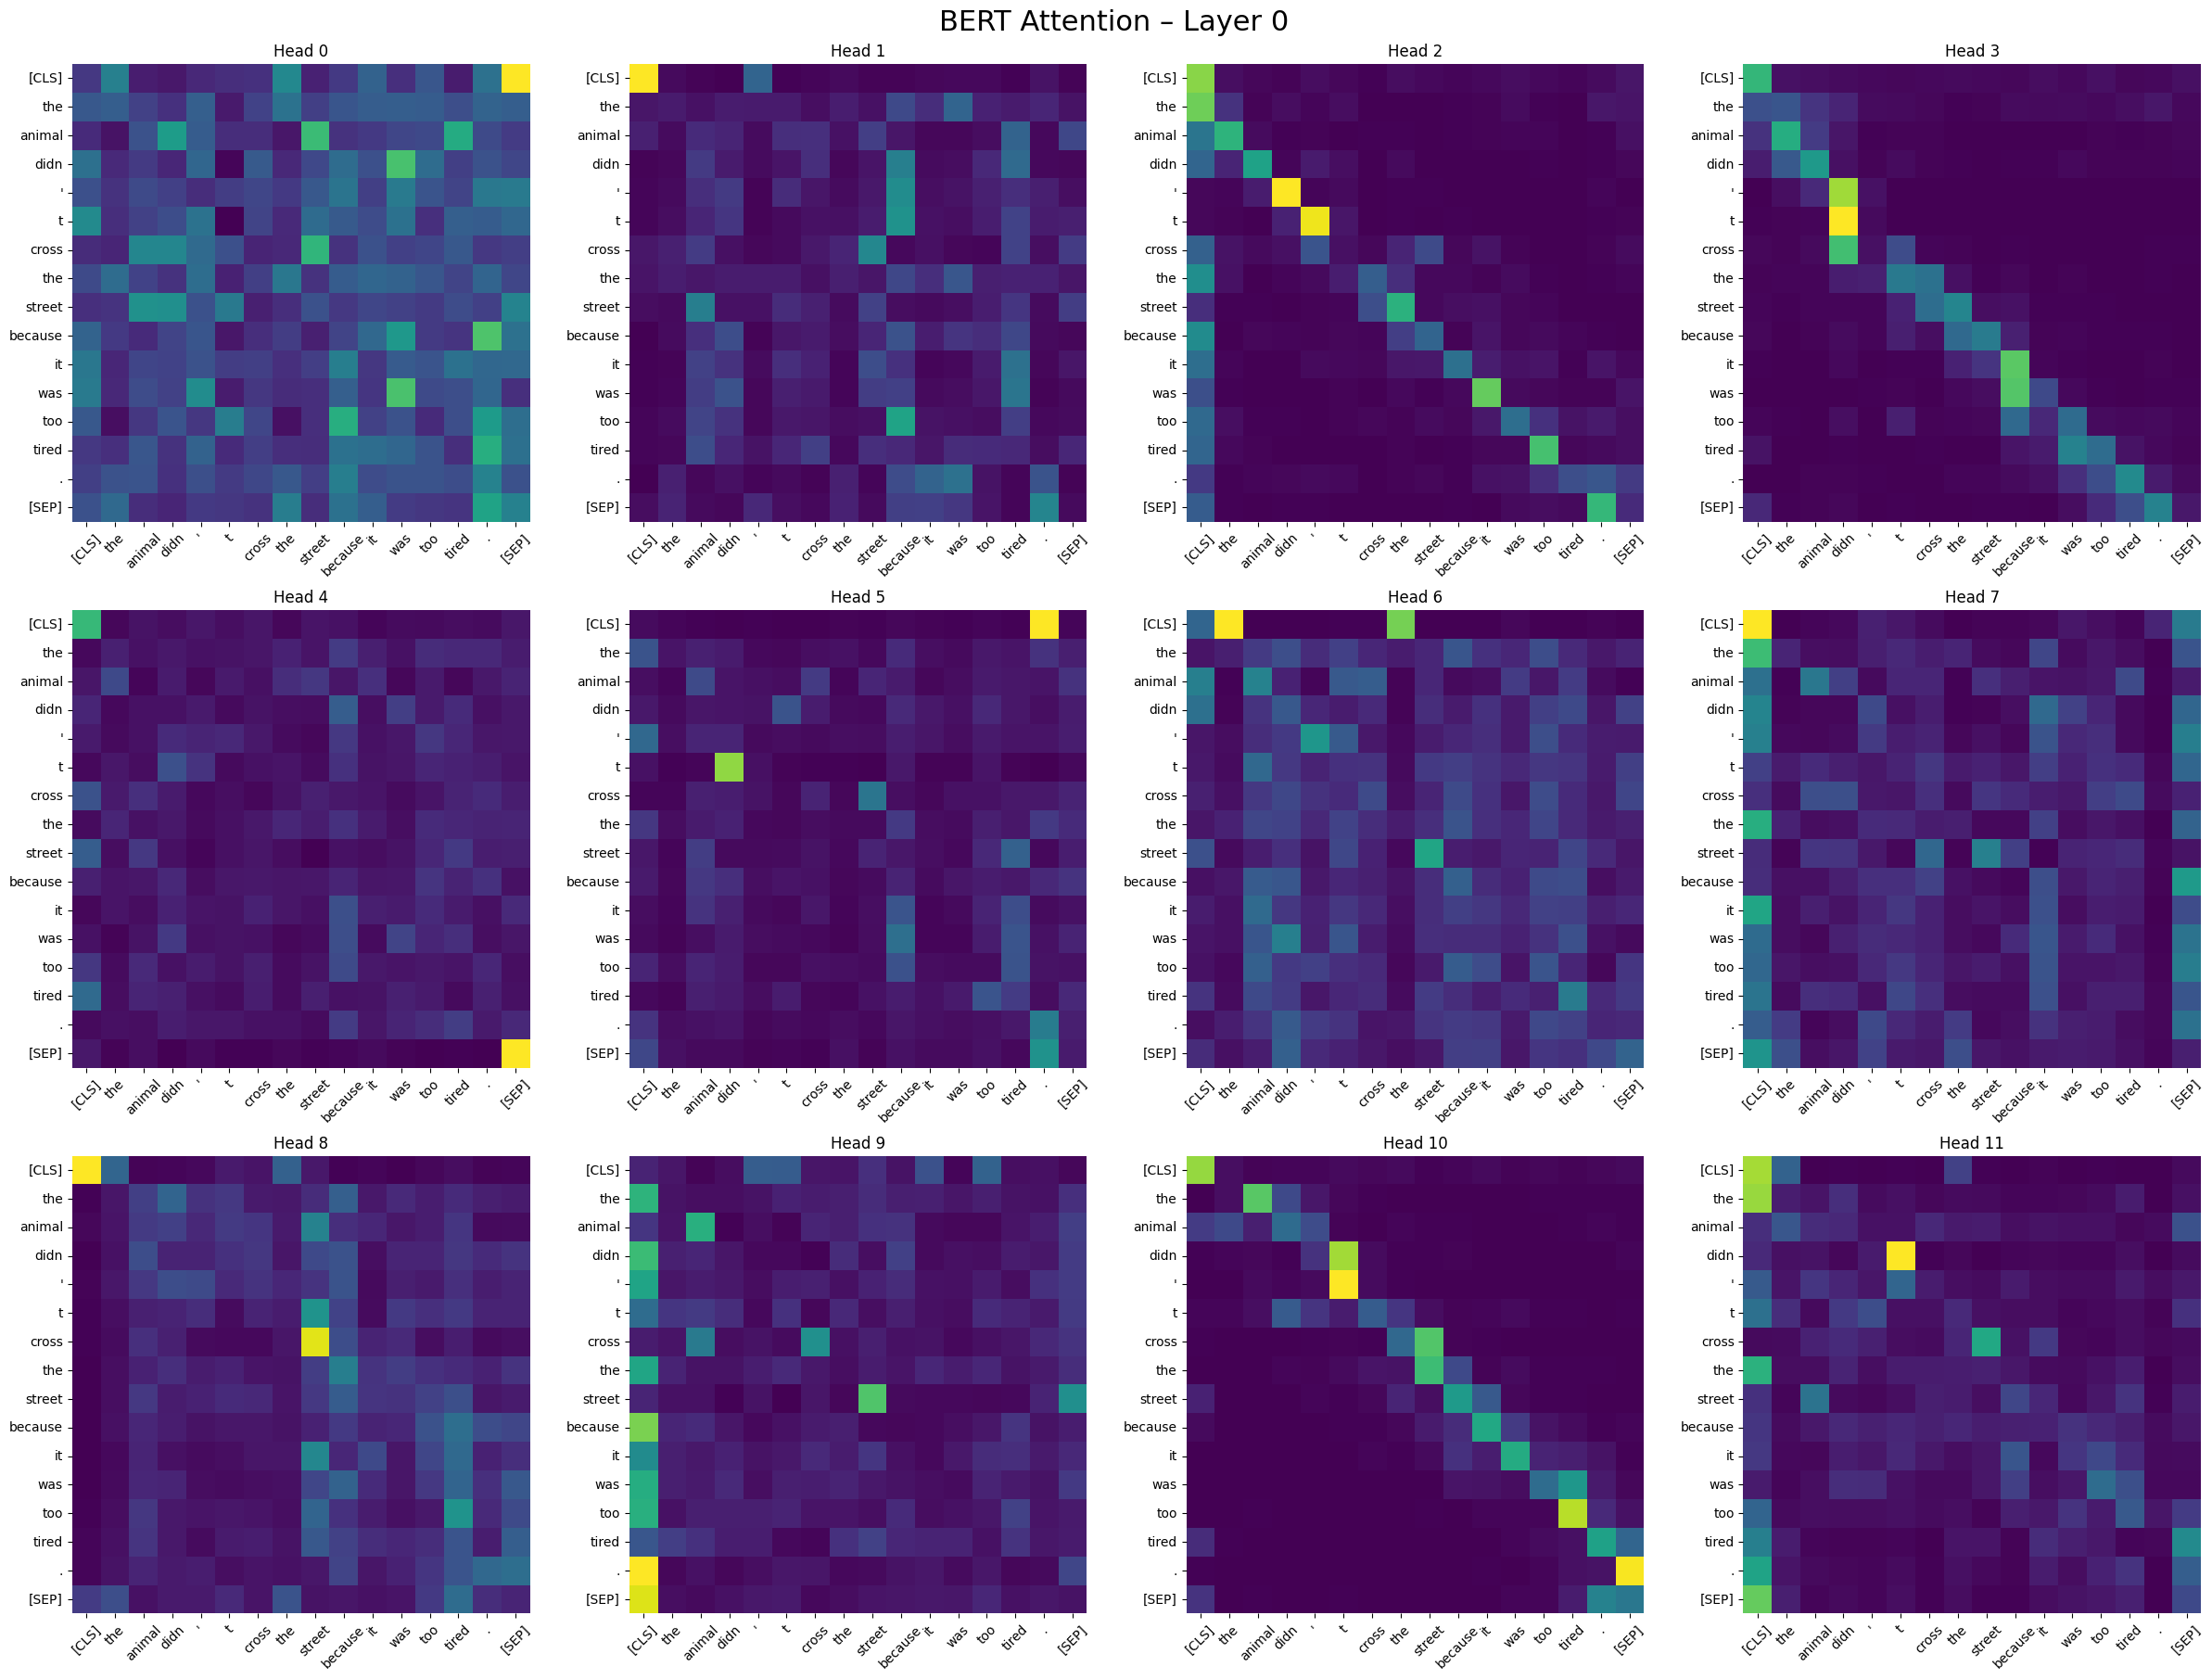

In [ ]:
# Wizualizacja atencji zdania data[0] w BERT

visualize_layer_heads(data[0], tokenizer, model)
